## Full 2-body motion - seperate file!!!
Notice the above has assumed that we have a planet that has a mass that is much less than the mass of the planet.

But what about if we have 2 stars orbiting eachother?  Can we still use this thinking?

It turns out we can!  We just have to re-write a few things.

In [1]:
# force/mass for particle mi
#def calcAcc(mj, ri, rj):
#    mag_r = np.sqrt( (ri-rj).dot(ri-rj) )
#    return -G*mj*(ri - rj)/mag_r**3.0


# 1. Matplotlib plots ?  then exercises?  
* see also https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/python-15/class-3

# 2. Reading files 
* see https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/python-15/class-4

# 3. Plot 2-body analytical plots

In [85]:
# mass of particle 1 in solar masses
m1 = 1.0
# mass of particle 2 in jupiter masses
m2 = 1.0 
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU
# velocity of m2 at this closest approach distance
vp = 30.0 # in km/s

vp = 42.0 # very elliptical

#vp = 43.0 # km/s, hyperbola

In [86]:
# lets convert these to physical units using definitions in an external library
from analytical_solution_library import MassOfSun, MassOfJupiter, AUinCM, kmincm, G

In [87]:
# convert coordinates
m1 = m1*MassOfSun
m2 = m2*MassOfJupiter
vp = vp*kmincm
rp = rp*AUinCM


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math


In [89]:
# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(m1+m2)) - 1.0
a = rp/(1.0 - ecc)


In [90]:
# Energy - from KE + PE with the viral theorem
energy = -G*m1*m2/(2.0*a)

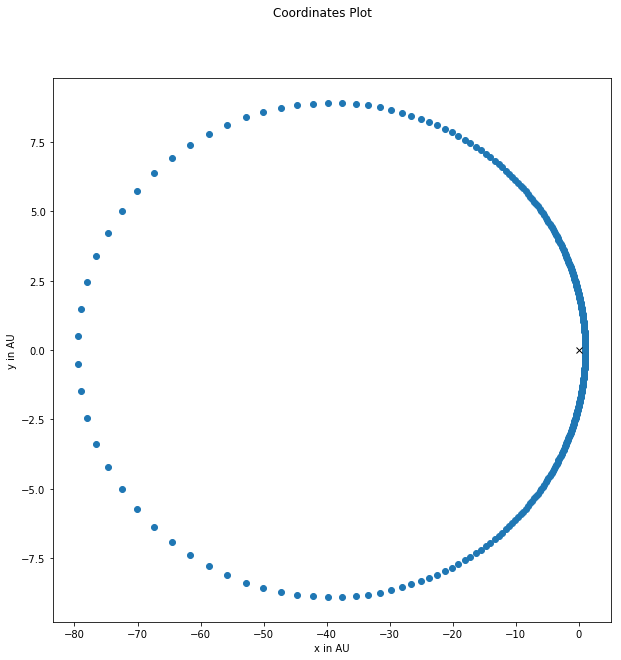

In [91]:
# now, generate the theta array
ntheta = 500 # number of points for theta
th_an = np.linspace(0, 360, ntheta) # make theta vector

# now, create r(theta)
r_an = (a*(1-ecc*ecc))/(1.0 + ecc*np.cos( th_an*np.pi/180.0 ))

# for plotting -> x/y coords for m2
x_an = r_an*np.cos( th_an*np.pi/180.0 )/AUinCM
y_an = r_an*np.sin( th_an*np.pi/180.0 )/AUinCM


# EXTRAS:
e_an = energy # for energy plot
l_an = m2*rp*vp # for angular momentum plot

#y_an = y_an[x_an <0]
#x_an = x_an[x_an < 0]

# ------------------ PLOTTING ----------------------  

# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

# plot the ellipse
#ax.plot(x_an, y_an, linewidth=5)
ax.plot(x_an,y_an, 'o')
ax.plot(0.0, 0.0, 'kx') # plot an "X" where the sun is
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')
#ax.set_ylim(-200,200)
#ax.set_xlim(-200,200)


plt.show()

In [64]:
# here are some checks to see what kind of orbit we are using
if energy > 0:
    print('Energy > 0: This will be a hyperbolic orbit, not continuing')
    import sys
    sys.exit()

if energy == 0:
    print('Energy = 0: This will be a parabolic orbit, not continuing')
    import sys
    sys.exit()

# check if eccentricity < 0
if ecc < 0:
    print('Eccetricity < 0: not continuing')
    import sys
    sys.exit()


Energy > 0: This will be a hyperbolic orbit, not continuing


SystemExit: 

In [65]:
th_an

array([  0.        ,   0.72144289,   1.44288577,   2.16432866,
         2.88577154,   3.60721443,   4.32865731,   5.0501002 ,
         5.77154309,   6.49298597,   7.21442886,   7.93587174,
         8.65731463,   9.37875752,  10.1002004 ,  10.82164329,
        11.54308617,  12.26452906,  12.98597194,  13.70741483,
        14.42885772,  15.1503006 ,  15.87174349,  16.59318637,
        17.31462926,  18.03607214,  18.75751503,  19.47895792,
        20.2004008 ,  20.92184369,  21.64328657,  22.36472946,
        23.08617234,  23.80761523,  24.52905812,  25.250501  ,
        25.97194389,  26.69338677,  27.41482966,  28.13627255,
        28.85771543,  29.57915832,  30.3006012 ,  31.02204409,
        31.74348697,  32.46492986,  33.18637275,  33.90781563,
        34.62925852,  35.3507014 ,  36.07214429,  36.79358717,
        37.51503006,  38.23647295,  38.95791583,  39.67935872,
        40.4008016 ,  41.12224449,  41.84368737,  42.56513026,
        43.28657315,  44.00801603,  44.72945892,  45.45